In [1]:
import sys, time, wmi, psutil
SYSTEM_INFO = wmi.WMI().Win32_OperatingSystem()[0]
"system: {0}, {1}, {2}".format(SYSTEM_INFO.Caption, SYSTEM_INFO.BuildNumber, SYSTEM_INFO.OSArchitecture) 
"memory: {}G".format(round(psutil.virtual_memory().total / 1024**3, 2))
"cpu: {}".format(psutil.cpu_count())
"python: {}".format(sys.version)
time.strftime('%Y-%m-%d %H:%M:%S', time.localtime(time.time()))

'system: Microsoft Windows 10 教育版, 18362, 64 位'

'memory: 15.86G'

'cpu: 4'

'python: 3.7.1 (default, Oct 28 2018, 08:39:03) [MSC v.1912 64 bit (AMD64)]'

'2020-02-29 16:22:47'

- 自己实现
- 使用`mlxtend`包中的`plot_decision_regions`函数

In [7]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from mlxtend.plotting import plot_decision_regions
# import seaborn as sns
# sns.set()

In [20]:
# 点太多了，关掉svg，不然太慢，一直画不出来
%config InlineBackend.figure_format = 'png'
plt.rcParams['figure.dpi']= 150  # 设置分辨率以提升清晰度 plt.rcParams和matplotlib.rcParams一致
plt.rcParams['figure.figsize'] = (4, 3)


def plot_2d_classification(data, labels, model=None, 
                           need_fit=True, predict_func='predict',
                           style='pcolormesh', cmap='autumn',
                           grid_step=0.01, x_margin=None, y_margin=None,
                           scatter_size=40, scatter_edge_width=1, scatter_edge_color='black',
                           xlabel=None, ylabel=None, title=None, show_ticks=True):
    """
    
    :param data: 2d
    :param labels: 1d
    :param model: 如果不传入则只绘制散点图
    :param need_fit: need run `model.fit(data, labels)`
    :param predict_func: 
        - 'predict': 预测分类的结果，绘制背景图的时候是二色的
        - 'predict_proba': 预测属于某一类的概率，绘制背景图的时候是渐变色的
    :param style:
        - 'pcolormesh': use `plt.pcolor.mesh` 绘制背景图
        - 'contour': use `plt.contour` 绘制分隔线
    :param cmap: 调色板，autumn/Paired/PuOr_r等，绘制渐变色背景时推荐选择PuOr_r，中间的分隔线白的比较明显
    :param grid_step: 
    :param x_margin:
    :param y_margin:
    :param scatter_size:
    :param scatter_edge_width:
    :param scatter_edge_color:
    :param xlabel:
    :param ylabel:
    :param title:
    :param show_ticks:
    :return: 
    """
    if model is not None:
        # fit 
        if need_fit:
            model.fit(data, labels)
        # calculate range
        x_min, x_max = data[:, 0].min(), data[:, 0].max()
        y_min, y_max = data[:, 1].min(), data[:, 1].max()
        if x_margin is None:
            x_margin = (x_max - x_min) * 0.05
        if y_margin is None:
            y_margin = (y_max - y_min) * 0.05
        x_min -= x_margin
        x_max += x_margin
        y_min -= y_margin
        y_max += y_margin
        #
        xx, yy = np.meshgrid(np.arange(x_min, x_max, grid_step), np.arange(y_min, y_max, grid_step))
        range_data = np.c_[xx.ravel(), yy.ravel()]
        # predict
        if predict_func == 'predict':
            range_labels = model.predict(range_data)
        elif predict_func == 'predict_proba':
            range_labels = model.predict_proba(range_data)[:, 1]
        else:
            raise Exception(f"invalid parameter predict_func: {predict_func}")
        labels_grid = range_labels.reshape(xx.shape)
        # plot
        if style == 'pcolormesh':  # Create a pseudocolor plot with a non-regular rectangular grid.
            plt.pcolormesh(xx, yy, labels_grid, cmap=cmap);  
            if predict_func == 'predict_proba':
                plt.colorbar();
#         elif style == 'imshow':
#             range_labels = model.predict_proba(range_data)[:, 1]
#             labels_grid = range_labels.reshape(xx.shape)
#             img = plt.imshow(labels_grid, interpolation='nearest',
#                              extent=(x_min, x_max, y_min, y_max),
#                              aspect='auto', origin='lower', cmap=cmap);
#             plt.colorbar(img);
        elif style == 'contour':
            plt.contour(xx, yy, labels_grid, cmap=cmap);  # todo 颜色的设置还需要调整
        else:
            raise Exception(f"invalid parameter style: {style}")
        plt.axis([x_min, x_max, y_min, y_max]);
        
    plt.scatter(data[:, 0], data[:, 1], c=labels, cmap=cmap,
                s=scatter_size, edgecolors=scatter_edge_color, linewidth=scatter_edge_width);
    # 如果需要legend，这里要拆开数据分系列各自画
    if xlabel is not None:
        plt.xlabel(xlabel);
    if ylabel is not None:
        plt.ylabel(ylabel);
    if title is not None:
        plt.title(title);
    if not show_ticks:
        plt.xticks(());
        plt.yticks(());
    # 还需要配合作图区域设置显示的ticks的范围

In [48]:
# 通过plt.scatter画散点图，通过plt.contourf画背景和分隔线
?plot_decision_regions

Signature:
plot_decision_regions(
    X,
    y,
    clf,
    feature_index=None,
    filler_feature_values=None,
    filler_feature_ranges=None,
    ax=None,
    X_highlight=None,
    res=None,
    zoom_factor=1.0,
    legend=1,
    hide_spines=True,
    markers='s^oxv<>',
    colors='#1f77b4,#ff7f0e,#3ca02c,#d62728,#9467bd,#8c564b,#e377c2,#7f7f7f,#bcbd22,#17becf',
    scatter_kwargs=None,
    contourf_kwargs=None,
    scatter_highlight_kwargs=None,
)
Docstring:
Plot decision regions of a classifier.

Please note that this functions assumes that class labels are
labeled consecutively, e.g,. 0, 1, 2, 3, 4, and 5. If you have class
labels with integer labels > 4, you may want to provide additional colors
and/or markers as `colors` and `markers` arguments.
See http://matplotlib.org/examples/color/named_colors.html for more
information.

Parameters
----------
X : array-like, shape = [n_samples, n_features]
    Feature Matrix.
y : array-like, shape = [n_samples]
    True class labels.
clf :

## 绘制二色背景

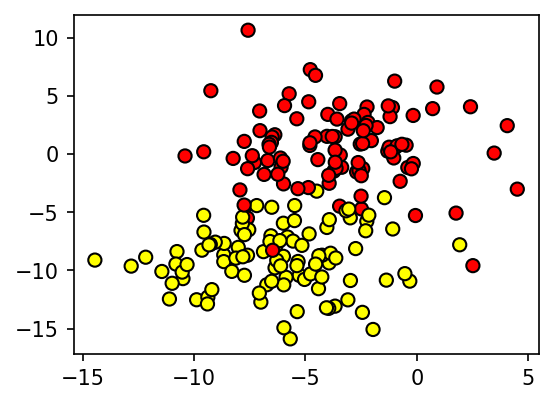

In [22]:
from sklearn.datasets import make_blobs

X, y = make_blobs(n_samples=200, n_features=2, centers=2, cluster_std=3, random_state=17)

plot_2d_classification(X, y)  # 不传入模型，只绘制散点图

In [23]:
from sklearn.tree import DecisionTreeClassifier

clf_tree = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=17)

Wall time: 968 ms


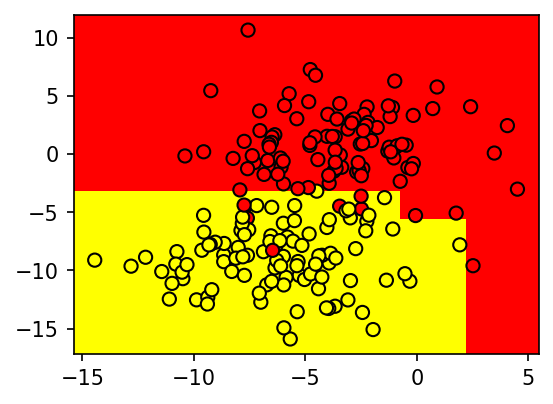

In [24]:
%%time
plot_2d_classification(X, y, clf_tree)

Wall time: 23 ms


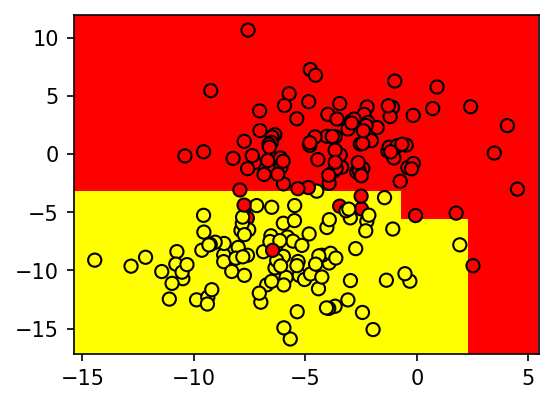

In [25]:
%%time
plot_2d_classification(X, y, clf_tree, grid_step=0.1)  # 调低精细度，加快绘制速度

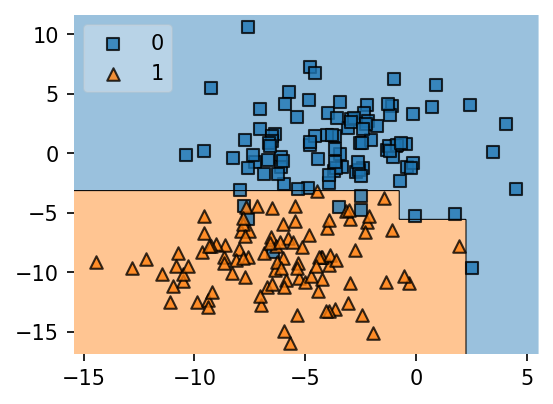

Wall time: 315 ms


In [27]:
%%time
plot_decision_regions(X, y, clf_tree, legend=2)  # legend参数决定legend的位置
plt.show();

## 绘制渐变背景

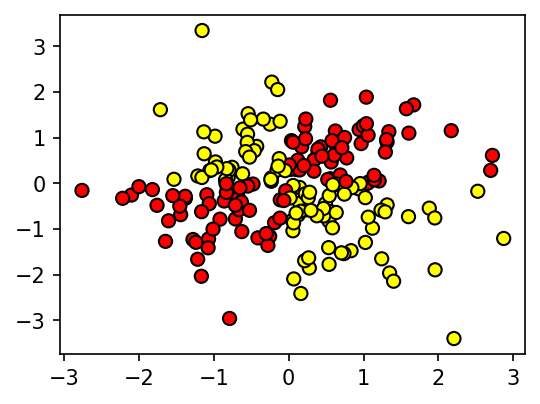

In [28]:
rng = np.random.RandomState(17)
X = rng.randn(200, 2)
y = np.logical_xor(X[:, 0] > 0, X[:, 1] > 0)

plot_2d_classification(X, y)

In [29]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(solver='lbfgs', random_state=17)

Wall time: 110 ms


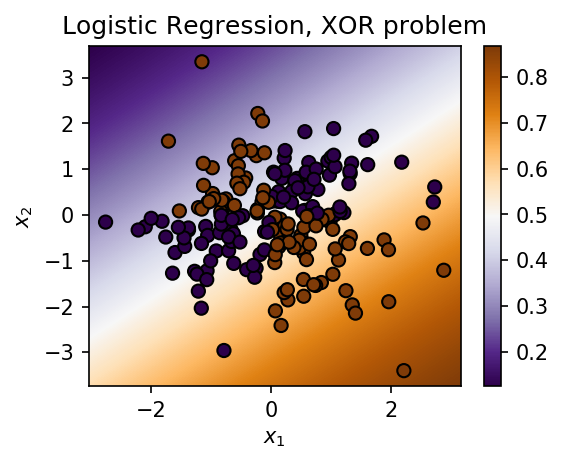

In [30]:
%%time
plot_2d_classification(X, y, model, predict_func='predict_proba', cmap='PuOr_r',
                       xlabel=r"$x_1$", ylabel=r"$x_2$", 
                       title="Logistic Regression, XOR problem")

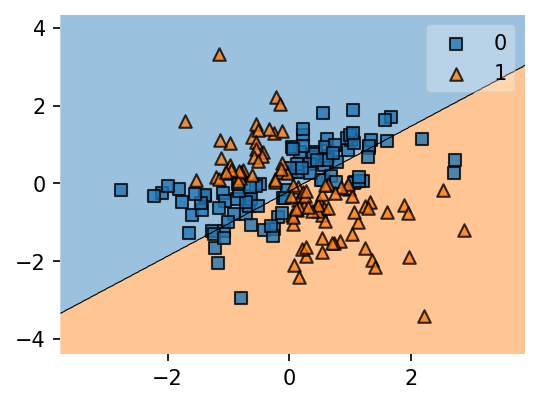

Wall time: 248 ms


In [35]:
%%time
plot_decision_regions(X, y.astype(int), model)  # y must be an integer array, 画不出渐变色的效果
plt.show();

In [36]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

pipe = make_pipeline(PolynomialFeatures(degree=2), LogisticRegression(solver='lbfgs'))

Wall time: 158 ms


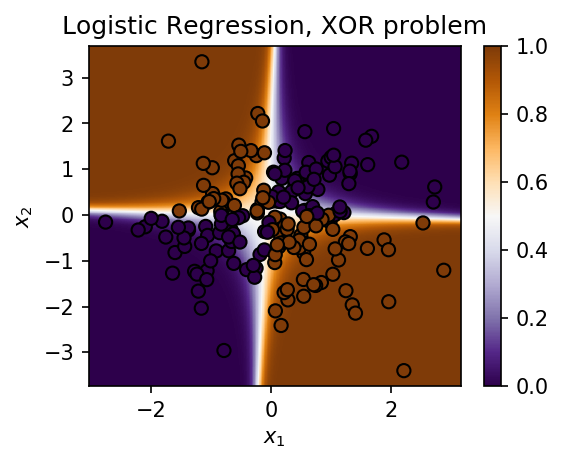

In [38]:
%%time
plot_2d_classification(X, y, pipe, predict_func='predict_proba', cmap='PuOr_r',
                       xlabel=r"$x_1$", ylabel=r"$x_2$", 
                       title="Logistic Regression, XOR problem")

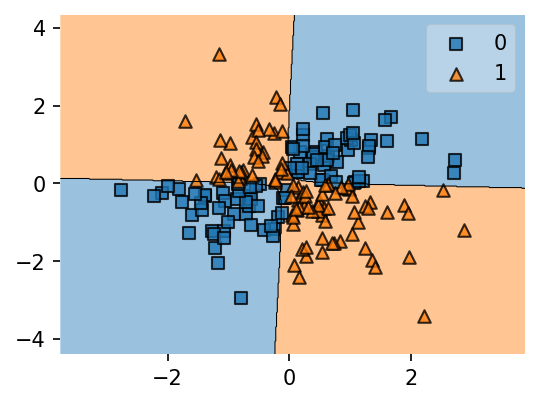

Wall time: 324 ms


In [39]:
%%time
plot_decision_regions(X, y.astype(int), pipe)  # y must be an integer array, 似乎不能画出渐变背景？
plt.show();

## 绘制分隔线

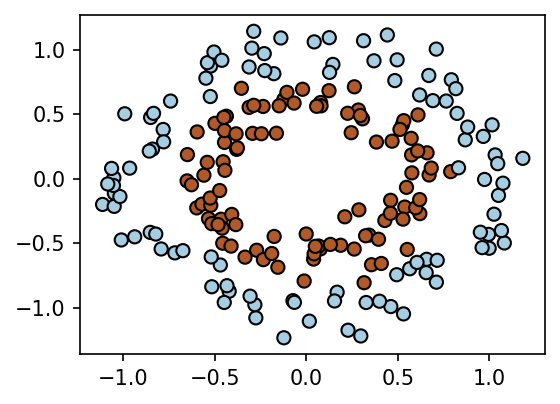

In [40]:
from sklearn.datasets import make_circles

X, y = make_circles(n_samples=200, noise=0.1, random_state=17, factor=0.6)

plot_2d_classification(X, y, cmap='Paired')

In [41]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

model = Pipeline([
    ('poly', PolynomialFeatures(degree=7)),
    ('logistic', LogisticRegression(C=1, random_state=17))
])

Wall time: 81 ms


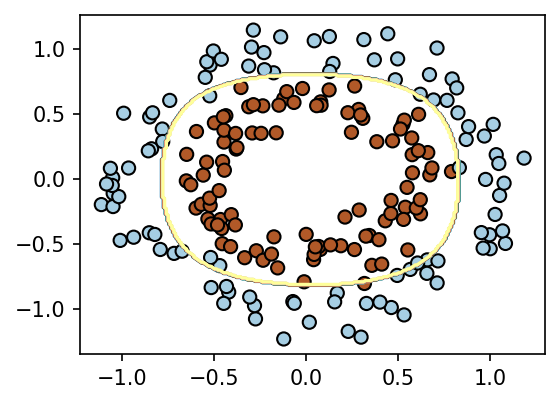

In [42]:
%%time
plot_2d_classification(X, y, model, style='contour', cmap='Paired')

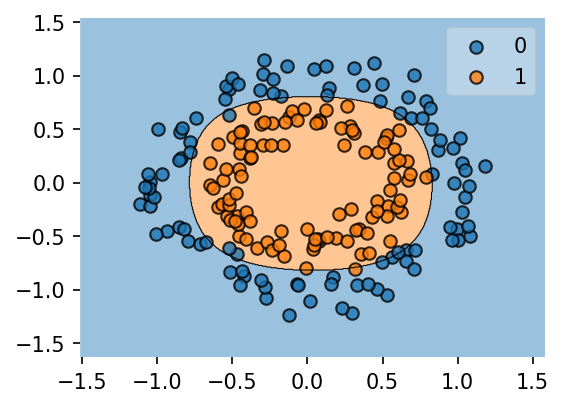

Wall time: 409 ms


In [51]:
%%time
plot_decision_regions(X, y, model, markers='o', zoom_factor=2.5)  # markers控制散点图的散点形状，zoom_factor控制放缩
plt.show();